In [3]:
import os
import pandas as pd

# Step 1: Go to your desktop
os.chdir("/Users/royho/Desktop")

# Step 2: Go into the correct data folder
os.chdir("World Bank Data - Datasets V2")

# Confirm the current directory and show files
print("Current directory:", os.getcwd())
print("Files:", os.listdir())


Current directory: /Users/royho/Desktop/World Bank Data - Datasets V2
Files: ['.DS_Store', 'Cleaned_WorldBank_FoodInflation.csv', 'Exchange Rates.csv', 'GDP (Current US$).csv', 'Inflation - Avg consumer prices index.csv', 'Consumer price index (2010 = 100).csv', 'Conusmer Prices, Food Indices (2015 = 100).csv', 'Population, total.csv']


In [4]:
df = pd.read_csv("Cleaned_WorldBank_FoodInflation.csv")
print("Data loaded successfully:", df.shape)
df.head()


✅ Data loaded successfully: (2340, 8)


,Country Code,Year,cpi,food,gdp,inflation,exchange,population
0,CAN,1940,13.344305,NaN,4.056377e+10,44.037,0.918274,17909356.0
1,CAN,1940,13.344305,NaN,4.056377e+10,44.037,0.918274,17909356.0
2,CAN,1940,13.344305,NaN,4.056377e+10,44.037,0.918274,17909356.0
3,CAN,1940,13.344305,NaN,4.056377e+10,44.037,0.918274,17909356.0
4,CAN,1940,13.344305,NaN,4.056377e+10,44.037,0.918274,17909356.0


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  2340 non-null   object 
 1   Year          2340 non-null   int64  
 2   cpi           2340 non-null   float64
 3   food          0 non-null      float64
 4   gdp           2340 non-null   float64
 5   inflation     2340 non-null   float64
 6   exchange      2340 non-null   float64
 7   population    2340 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 146.4+ KB


Country Code       0
Year               0
cpi                0
food            2340
gdp                0
inflation          0
exchange           0
population         0
dtype: int64

In [9]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  2340 non-null   object 
 1   Year          2340 non-null   int64  
 2   cpi           2340 non-null   float64
 3   gdp           2340 non-null   float64
 4   inflation     2340 non-null   float64
 5   exchange      2340 non-null   float64
 6   population    2340 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 128.1+ KB


,Country Code,Year,cpi,gdp,inflation,exchange,population
0,CAN,1940,13.344305,4.056377e+10,44.037,0.918274,17909356.0
1,CAN,1940,13.344305,4.056377e+10,44.037,0.918274,17909356.0
2,CAN,1940,13.344305,4.056377e+10,44.037,0.918274,17909356.0
3,CAN,1940,13.344305,4.056377e+10,44.037,0.918274,17909356.0
4,CAN,1940,13.344305,4.056377e+10,44.037,0.918274,17909356.0


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2340.0,1.988962e+03,2.335816e+01,1.940000e+03,1.972000e+03,1.992000e+03,2.008000e+03,2.029000e+03
cpi,2340.0,5.890837e+01,4.609549e+01,1.290455e-02,1.356306e+01,5.879365e+01,9.796079e+01,1.844327e+02
gdp,2340.0,3.361131e+12,5.957231e+12,1.304000e+10,2.438911e+11,7.655500e+11,2.173340e+12,2.918489e+13
inflation,2340.0,9.070405e+01,7.042250e+01,5.700000e-02,4.403700e+01,8.238300e+01,1.239420e+02,3.476170e+02
exchange,2340.0,1.034146e+01,2.784135e+01,4.654278e-02,7.322395e-01,1.000000e+00,1.000000e+00,1.156069e+02
population,2340.0,1.225969e+08,1.037378e+08,1.790936e+07,3.324730e+07,8.604481e+07,2.098960e+08,3.401110e+08


Correlations

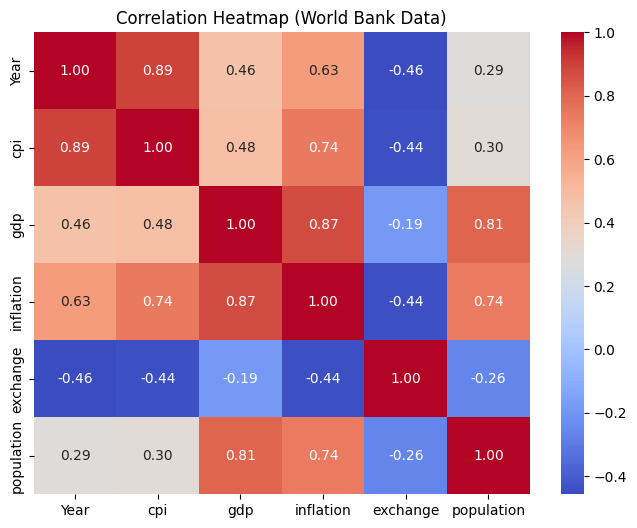

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (World Bank Data)")
plt.show()


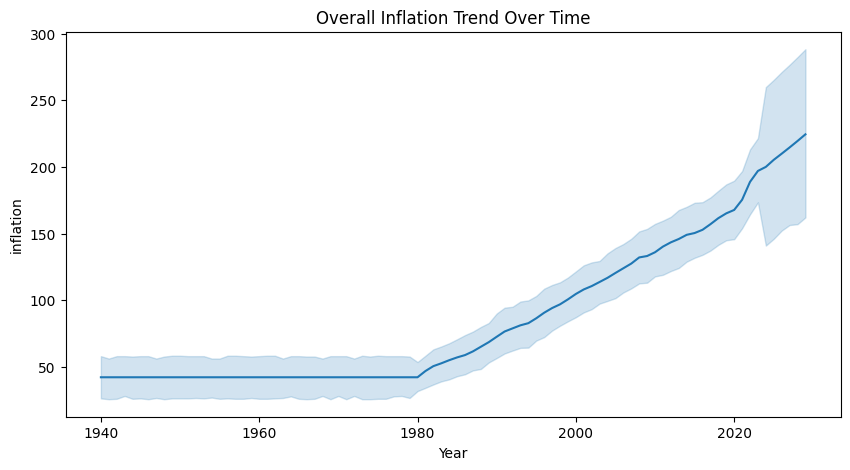

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='inflation')
plt.title("Overall Inflation Trend Over Time")
plt.show()


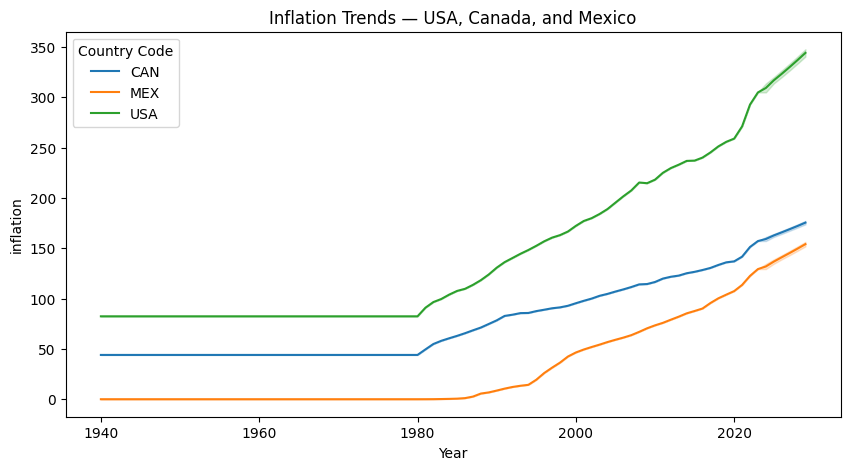

In [13]:
countries = ['USA', 'CAN', 'MEX']
subset = df[df['Country Code'].isin(countries)]

plt.figure(figsize=(10,5))
sns.lineplot(data=subset, x='Year', y='inflation', hue='Country Code')
plt.title("Inflation Trends — USA, Canada, and Mexico")
plt.show()


In [15]:
df['Country Code'].value_counts().head(10)


Country Code
CAN    780
MEX    780
USA    780
Name: count, dtype: int64

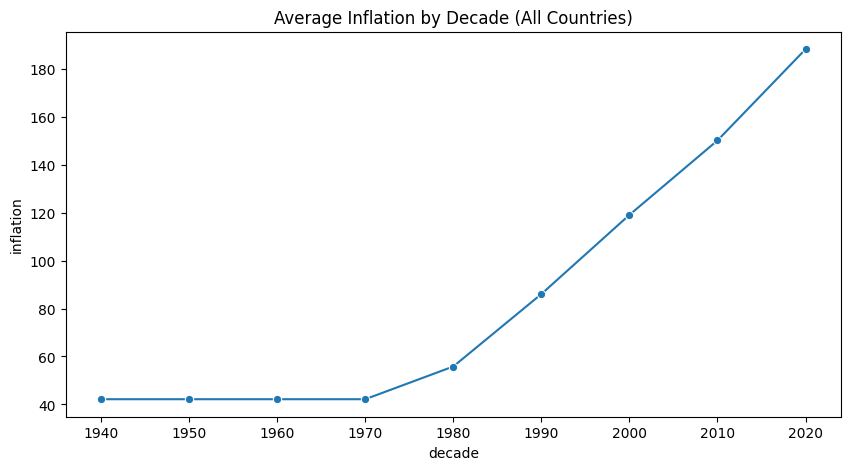

In [17]:
df['decade'] = (df['Year'] // 10) * 10
inflation_decade = df.groupby('decade')['inflation'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=inflation_decade, x='decade', y='inflation', marker='o')
plt.title("Average Inflation by Decade (All Countries)")
plt.show()


In [18]:
df.groupby('Country Code')[['gdp','inflation']].corr().unstack().iloc[:,1].sort_values(ascending=False).head(10)


Country Code
USA    0.993910
MEX    0.976184
CAN    0.972550
Name: (gdp, inflation), dtype: float64